In [176]:
from os import path
import pickle

import astropy.coordinates as coord
from astropy.table import Table
import astropy.units as u
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('apw-notebook')
%matplotlib inline
import sqlutil
from scipy.stats import binned_statistic_dd

In [197]:
q = """
SELECT * FROM gaia_dr1_aux.gaia_source_sdssdr9_xm_new as gaia_sdss
JOIN sdssdr9.sppparams ON gaia_sdss.objid = sdssdr9.sppparams.bestobjid
LIMIT 10
"""

In [198]:
res = sqlutil.get(q, db='wsdb', host='cappc127.ast.cam.ac.uk', 
                  user='gaia_sprint', password='NOT@Gaia_sprint', 
                  asDict=True)

/Users/adrian/projects/wsdb/notebooks/sqlutil.py:332: UserWarning: Column name specobjid is repeated in the output, new name specobjid_1 assigned
  'new name %s assigned')%(_n,curn))


In [200]:
tbl = Table(res)
tbl

solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_good_obs_ac,astrometric_n_bad_obs_al,astrometric_n_bad_obs_ac,astrometric_delta_q,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_primary_flag,astrometric_relegation_factor,astrometric_weight_al,astrometric_weight_ac,astrometric_priors_used,matched_observations,duplicated_source,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_variable_flag,l,b,ecl_lon,ecl_lat,objid,skyversion,run,rerun,camcol,field,obj,mode,nchild,type,probpsf,insidemask,flags,flags_u,flags_g,flags_r,flags_i,flags_z,psfmag_u,psfmag_g,psfmag_r,psfmag_i,psfmag_z,psfmagerr_u,psfmagerr_g,psfmagerr_r,psfmagerr_i,psfmagerr_z,petromag_u,petromag_g,petromag_r,petromag_i,petromag_z,petromagerr_u,petromagerr_g,petromagerr_r,petromagerr_i,petromagerr_z,petror50_r,petror90_r,modelmag_u,modelmag_g,modelmag_r,modelmag_i,modelmag_z,modelmagerr_u,modelmagerr_g,modelmagerr_r,modelmagerr_i,modelmagerr_z,cmodelmag_u,cmodelmag_g,cmodelmag_r,cmodelmag_i,cmodelmag_z,cmodelmagerr_u,cmodelmagerr_g,cmodelmagerr_r,cmodelmagerr_i,cmodelmagerr_z,mrrcc_r,mrrccerr_r,mrrccpsf_r,fracdev_u,fracdev_g,fracdev_r,fracdev_i,fracdev_z,psffwhm_u,psffwhm_g,psffwhm_r,psffwhm_i,psffwhm_z,resolvestatus,thingid,balkanid,nobserve,ndetect,calibstatus_u,calibstatus_g,calibstatus_r,calibstatus_i,calibstatus_z,s_ra,s_dec,cx,cy,cz,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,htmid,fieldid,specobjid,size,dist,gs_pmra,gs_pmdec,pmra_new,pmdec_new,s_ra1,s_dec1,specobjid_1,bestobjid,fluxobjid,targetobjid,plateid,scienceprimary,legacyprimary,segueprimary,firstrelease,survey,programname,chunk,platerun,mjd,plate,fiberid,run2d,run1d,runsspp,targetstring,primtarget,sectarget,legacy_target1,legacy_target2,special_target1,special_target2,segue1_target1,segue1_target2,segue2_target1,segue2_target2,spectypehammer,spectypesubclass,flag,teffadop,teffadopn,teffadopunc,teffha24,teffhd24,teffngs1,teffannsr,teffannrr,teffwbg,teffk24,teffki13,teffha24ind,teffhd24ind,teffngs1ind,teffannsrind,teffannrrind,teffwbgind,teffk24ind,teffki13ind,teffha24unc,teffhd24unc,teffngs1unc,teffannsrunc,teffannrrunc,teffwbgunc,teffk24unc,teffki13unc,loggadop,loggadopn,loggadopunc,loggngs2,loggngs1,loggannsr,loggannrr,loggcai1,loggwbg,loggk24,loggki13,loggngs2ind,loggngs1ind,loggannsrind,loggannrrind,loggcai1ind,loggwbgind,loggk24ind,loggki13ind,loggngs2unc,loggngs1unc,loggannsrunc,loggannrrunc,loggcai1unc,loggwbgunc,loggk24unc,loggki13unc,fehadop,fehadopn,fehadopunc,fehngs2,fehngs1,fehannsr,fehannrr,fehcaiik1,fehcaiik2,fehcaiik3,fehwbg,fehk24,fehki13,fehngs2ind,fehngs1ind,fehannsrind,fehannrrind,fehcaiik1ind,fehcaiik2ind,fehcaiik3ind,fehwbgind,fehk24ind,fehki13ind,fehngs2unc,fehngs1unc,fehannsrunc,fehannrrunc,fehcaiik1unc,fehcaiik2unc,fehcaiik3unc,fehwbgunc,fehk24unc,fehki13unc,snr,qa,cccahk,ccmgh,teffspec,teffspecn,teffspecunc,loggspec,loggspecn,loggspecunc,fehspec,fehspecn,fehspecunc,acf1,acf1snr,acf2,acf2snr,inspect,elodiervfinal,elodiervfinalerr,zwarning,teffirfm,teffirfmind,teffirfmunc,loggngs1irfm,loggngs1irfmind,loggngs1irfmunc,fehngs1irfm,fehngs1irfmind,fehngs1irfmunc,loggcai1irfm,loggcai1irfmind,loggcai1irfmunc,fehcaiik1irfm,fehcaiik1irfmind,fehcaiik1irfmunc
int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32,int32,float32,float64,float64,bool,float32,float32

In [ ]:
query = """
SELECT {0} FROM gaia_dr1_aux.gaia_source_sdssdr9_xm_new as gaia_sdss
JOIN sdssdr9.sppparams ON gaia_sdss.objid = sdssdr9.sppparams.bestobjid
{1}
"""

In [179]:
res.keys()

odict_keys(['solution_id', 'source_id', 'random_index', 'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'astrometric_n_obs_al', 'astrometric_n_obs_ac', 'astrometric_n_good_obs_al', 'astrometric_n_good_obs_ac', 'astrometric_n_bad_obs_al', 'astrometric_n_bad_obs_ac', 'astrometric_delta_q', 'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'astrometric_primary_flag', 'astrometric_relegation_factor', 'astrometric_weight_al', 'astrometric_weight_ac', 'astrometric_priors_used', 'matched_observations', 'duplicated_source', 'scan_direction_strength_k1', 'scan_direction_strength_k2', 'scan_direction_strength_k3', 'scan_direction_strength_k4', 'scan_direction_mean_k1', 'scan_direction_mean_k2', 'scan_direction_mean_k3', 'sc

In [180]:
columns = [
    'source_id', 'ra', 'dec', 'l', 'b', 
    'pmra_new', 'pmdec_new', 
    'psfmag_u', 'psfmag_g', 'psfmag_r', 'psfmag_i',
    'psfmagerr_u', 'psfmagerr_g', 'psfmagerr_r', 'psfmagerr_i',
    'extinction_u', 'extinction_g', 'extinction_r', 'extinction_i',
    'teffadop', 'loggadop', 'fehadop',
    'teffadopunc', 'loggadopunc', 'fehadopunc',
    'elodiervfinal', 'elodiervfinalerr',
]

post_query = """WHERE fehadop != -9999. AND loggadop != -9999. AND teffadop != -9999. AND 
loggadop > 0 AND
teffadop > 4500 AND teffadop < 7000. AND 
psfmag_g > 14 AND psfmag_g < 19.5
"""

In [181]:
cache_file = "sspp.pickle"

if not path.exists(cache_file):
    res = sqlutil.get(query.format(','.join(columns), post_query),
                      db='wsdb', host='cappc127.ast.cam.ac.uk', 
                      user='gaia_sprint', password='NOT@Gaia_sprint', 
                      asDict=True)

    with open(cache_file, "wb") as f:
        pickle.dump(res, f)
        
else:
    with open(cache_file, "rb") as f:
        res = pickle.load(f)

In [182]:
tbl = Table(res)

In [183]:
len(tbl)

329267

(-50, 50)

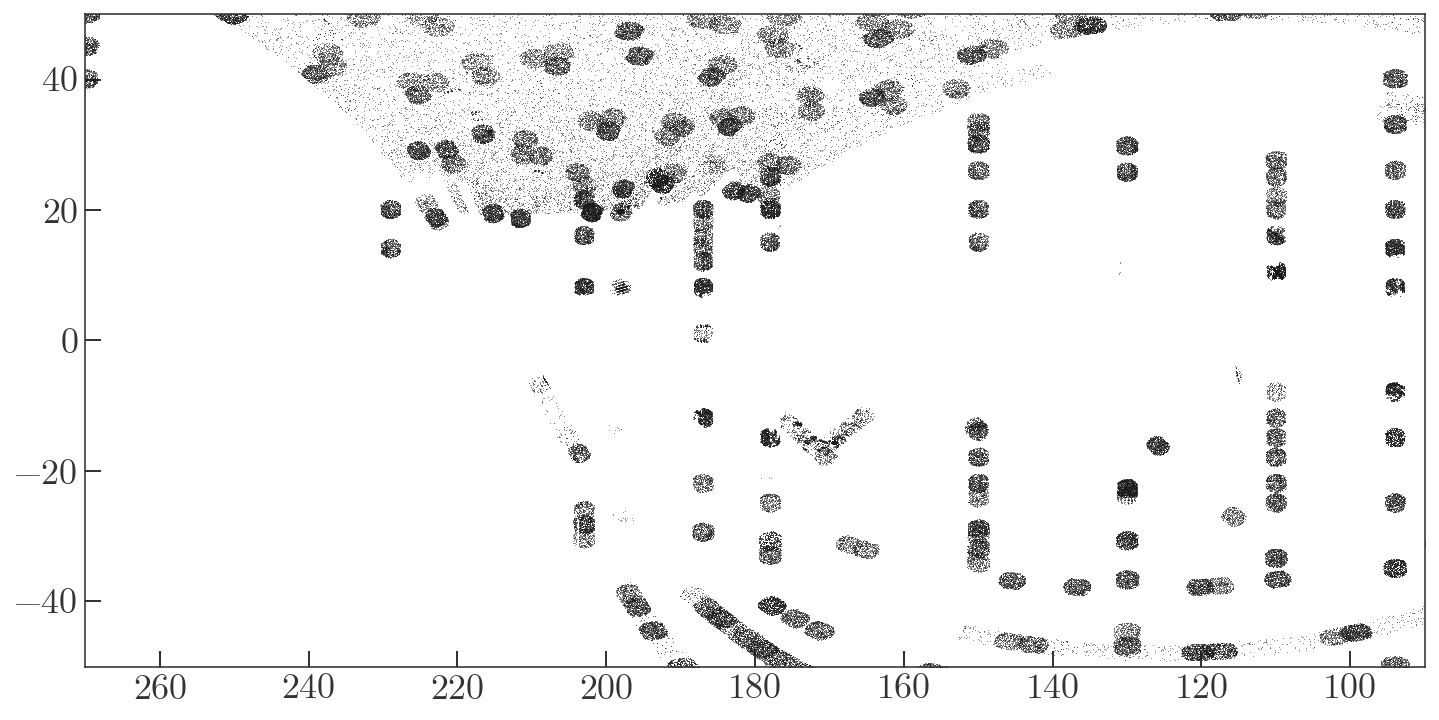

In [184]:
plt.figure(figsize=(12,6))
plt.plot(tbl['l'], tbl['b'], marker=',', linestyle='none', alpha=0.5)
plt.xlim(180+90, 180-90)
plt.ylim(-50, 50)

(5, 2.5)

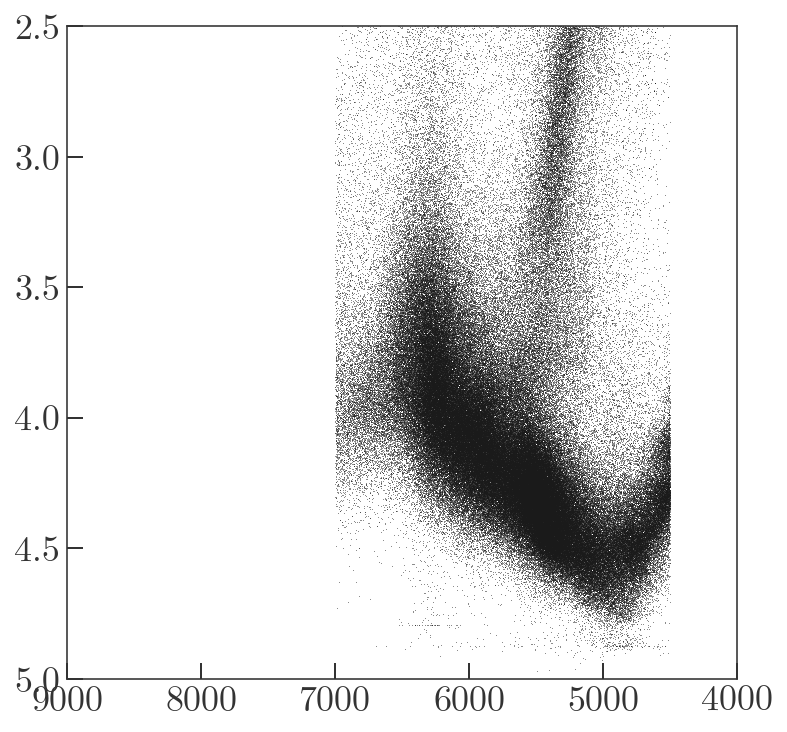

In [185]:
plt.figure(figsize=(6,6))
plt.plot(tbl['teffadop'], tbl['loggadop'], 
         marker=',', linestyle='none', alpha=0.5)
plt.xlim(9000, 4000)
plt.ylim(5, 2.5)

In [186]:
tbl.colnames

['source_id',
 'ra',
 'dec',
 'l',
 'b',
 'pmra_new',
 'pmdec_new',
 'psfmag_u',
 'psfmag_g',
 'psfmag_r',
 'psfmag_i',
 'psfmagerr_u',
 'psfmagerr_g',
 'psfmagerr_r',
 'psfmagerr_i',
 'extinction_u',
 'extinction_g',
 'extinction_r',
 'extinction_i',
 'teffadop',
 'loggadop',
 'fehadop',
 'teffadopunc',
 'loggadopunc',
 'fehadopunc',
 'elodiervfinal',
 'elodiervfinalerr']

In [187]:
u0 = tbl['psfmag_u'] - tbl['extinction_u']
g0 = tbl['psfmag_g'] - tbl['extinction_g']
r0 = tbl['psfmag_r'] - tbl['extinction_r']
i0 = tbl['psfmag_i'] - tbl['extinction_i']

# Eq. A1 in the appendix of Ivezic+2008
Mr0 = -2.85 + 6.29*(g0-i0) - 2.3*(g0-i0)**2
dMr = 4.5 - 1.11*tbl['fehadop'] - 0.18*tbl['fehadop']**2

Mr = Mr0 + dMr

tbl['I08_dist'] = coord.Distance(distmod=r0 - Mr).kpc

/Users/adrian/anaconda/lib/python3.5/site-packages/astropy/coordinates/distances.py:192: RuntimeWarning: overflow encountered in power
  return cls(10 ** ((dm.value + 5) / 5.), u.pc, copy=False)


In [188]:
# Ivezic cuts to get to main stellar locus
mask = ((g0-r0) > 0.2) & ((g0-r0) < 0.6)
mask &= ((u0-g0) > 0.7) & ((u0-g0) < 2.)
mask &= (((g0-r0) - 0.5*(u0-g0)) > -0.25) & ( ((g0-r0) - 0.5*(u0-g0)) < 0.05)
mask &= ((0.35*(g0-r0) - (r0-i0)) > -0.2) & ((0.35*(g0-r0) - (r0-i0)) < 0.1)

# Hack to get main-sequence
mask &= tbl['loggadop'] > 3.5

# Data quality
mask &= tbl['elodiervfinalerr'] < 10
mask &= (tbl['I08_dist'] > 0.5) & (tbl['I08_dist'] < 30.) # kpc
mask &= np.isfinite(tbl['I08_dist'])

masked = tbl[mask]

print(mask.sum())

188990


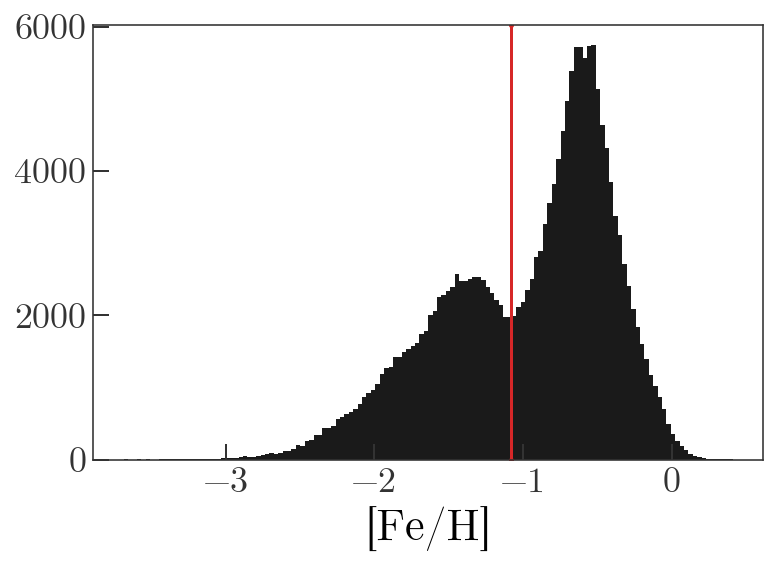

In [189]:
plt.hist(masked['fehadop'], bins='auto');
plt.xlabel('[Fe/H]')
plt.axvline(-1.08, color='tab:red')

In [190]:
icrs = coord.ICRS(ra=masked['ra']*u.deg, dec=masked['dec']*u.deg,
                  distance=masked['I08_dist']*u.kpc, 
                  pm_ra_cosdec=masked['pmra_new']*u.mas/u.yr,
                  pm_dec=masked['pmdec_new']*u.mas/u.yr,
                  radial_velocity=masked['elodiervfinal']*u.km/u.s)

In [191]:
gc_frame = coord.Galactocentric()
gc = icrs.transform_to(gc_frame)

gc_cyl = gc.copy()
gc_cyl.set_representation_cls(coord.CylindricalRepresentation)

In [192]:
mask2 = masked['fehadop'] > -1.08
mask2 &= np.abs(gc_cyl.z.value) < 5

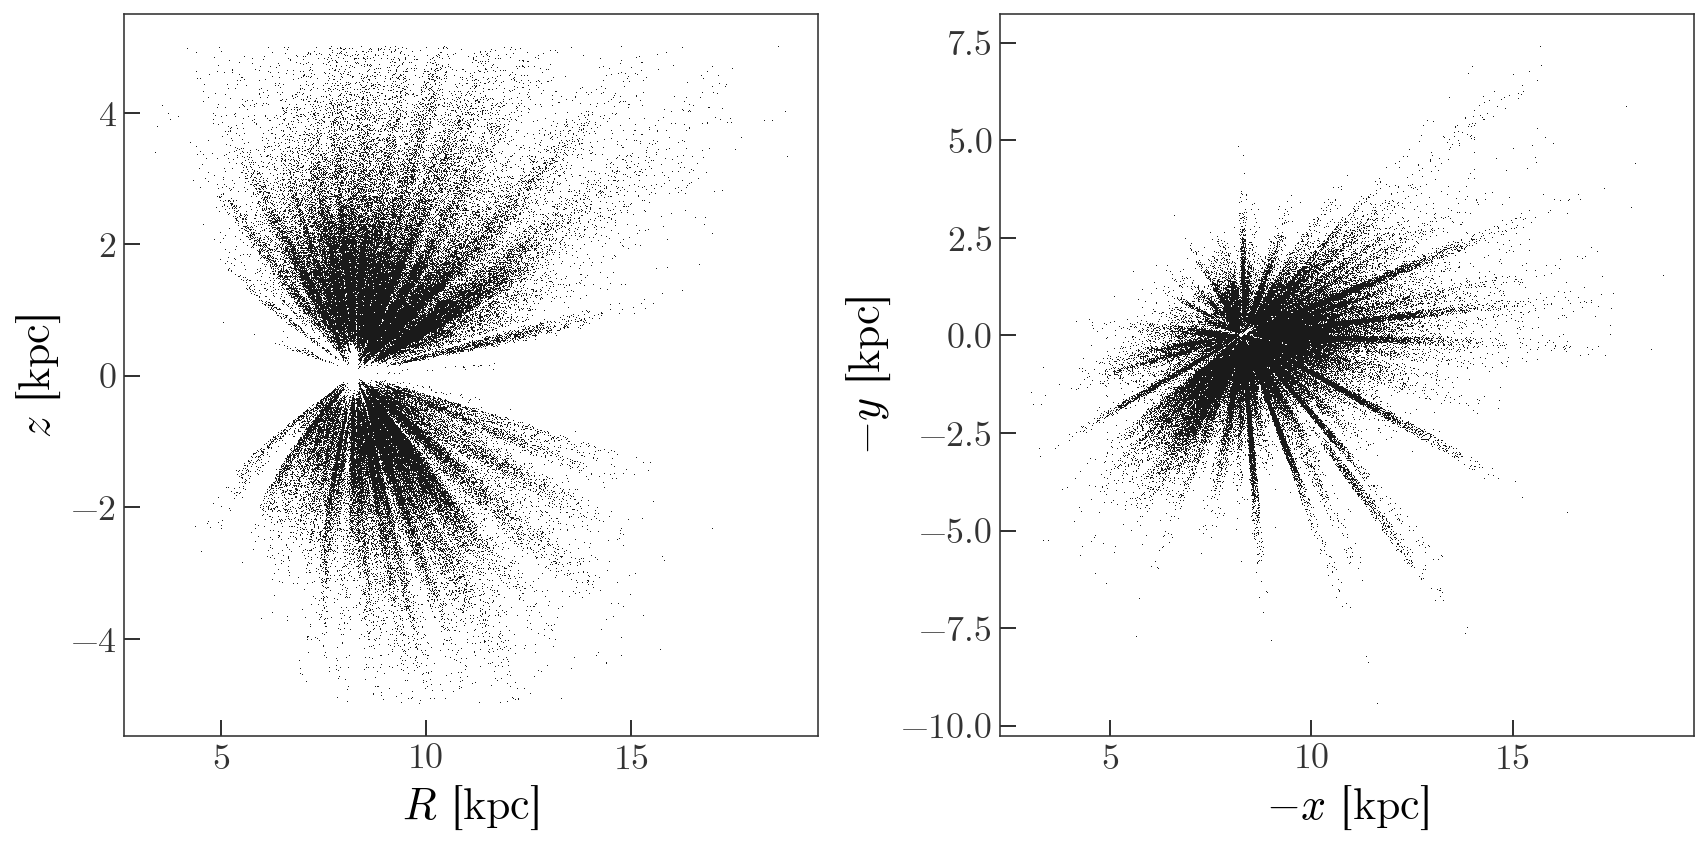

In [193]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

axes[0].plot(gc_cyl.rho.value[mask2], gc_cyl.z.value[mask2], 
             marker=',', linestyle='none')
axes[0].set_xlabel('$R$ [kpc]')
axes[0].set_ylabel('$z$ [kpc]')

axes[1].plot(-gc.x.value[mask2], -gc.y.value[mask2], 
             marker=',', linestyle='none')
axes[1].set_xlabel('$-x$ [kpc]')
axes[1].set_ylabel('$-y$ [kpc]')

fig.tight_layout()

In [194]:
bres = binned_statistic_dd(np.vstack((gc.x.value, gc.y.value, gc.z.value)).T[mask2], 
                           gc_cyl.d_z.to(u.km/u.s).value[mask2],
                           bins=(np.arange(-15, -5+0.5, 0.5), 
                                 np.arange(-5, 5+0.5, 0.5),
                                 np.arange(-2, 2+0.5, 0.5)))

In [195]:
bres.statistic.shape

(20, 20, 8)

/Users/adrian/anaconda/lib/python3.5/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


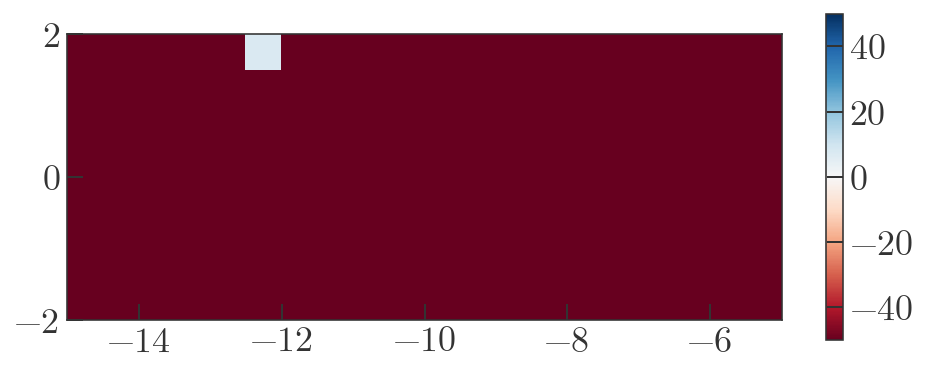

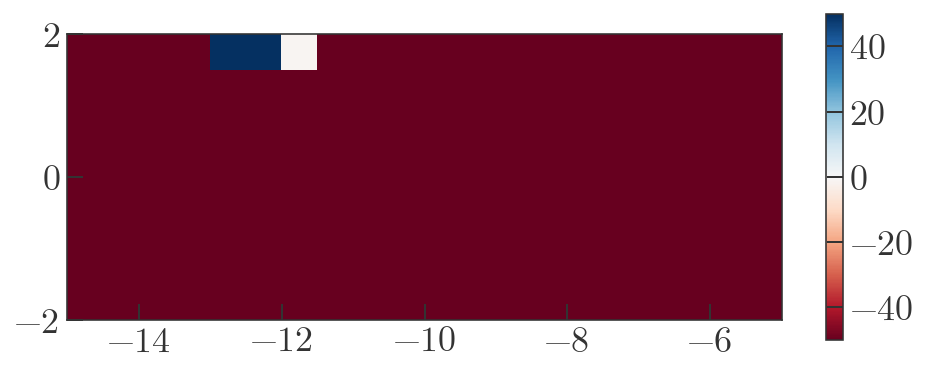

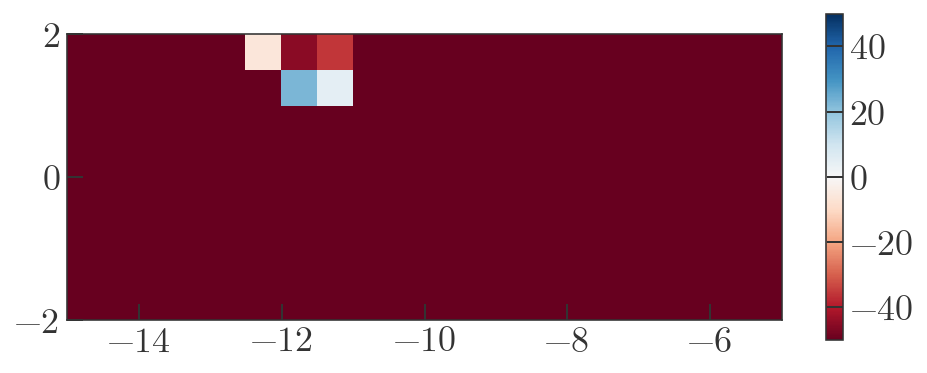

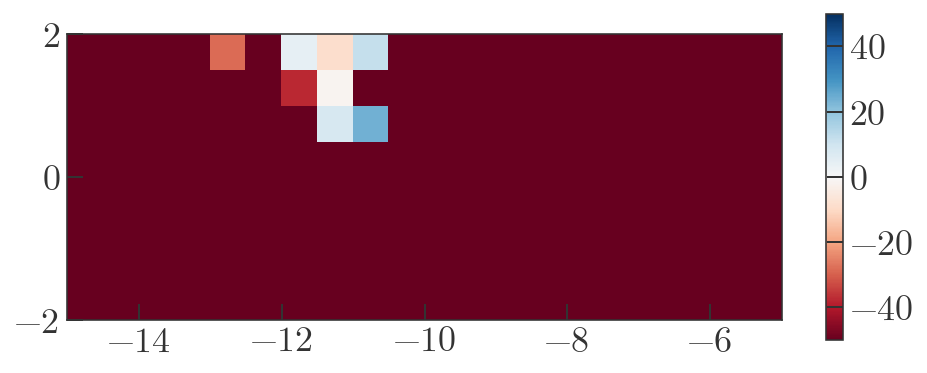

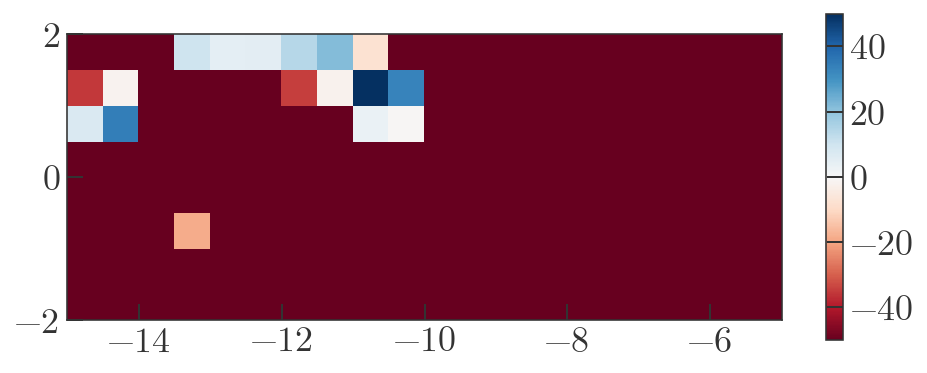

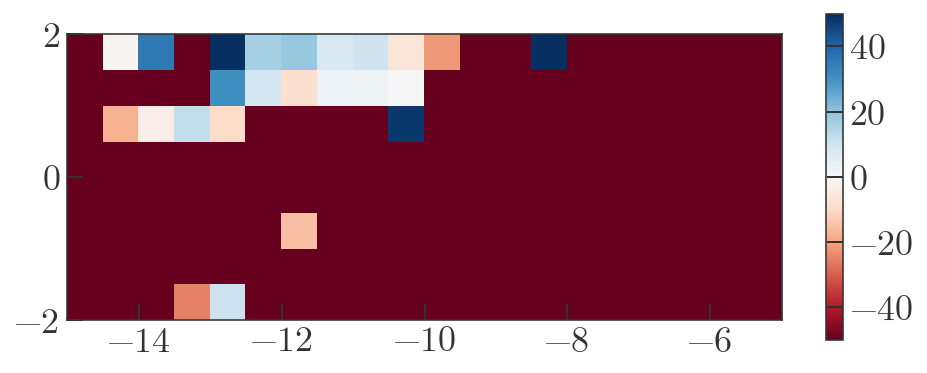

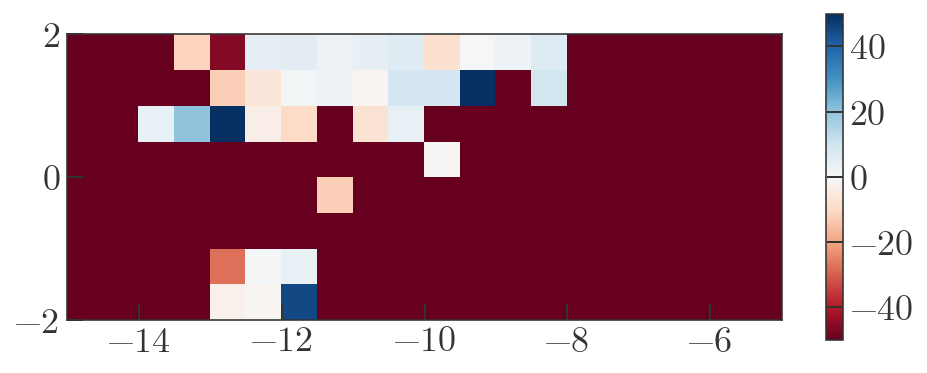

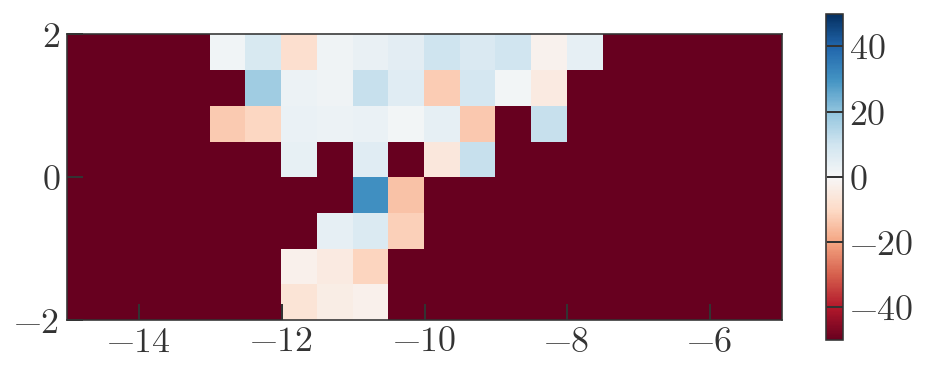

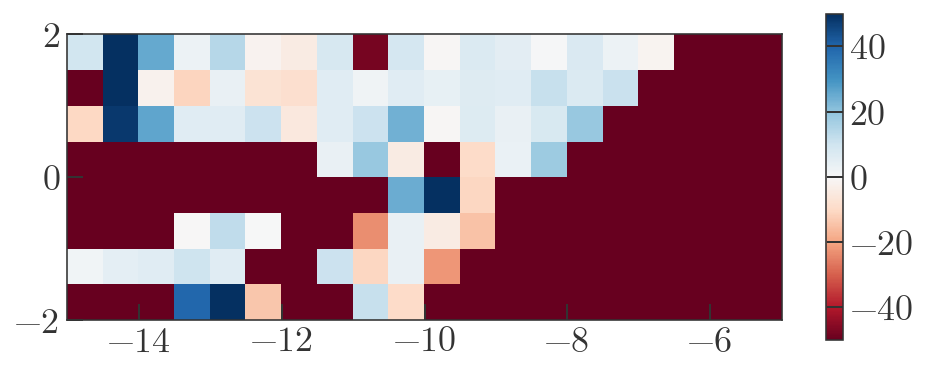

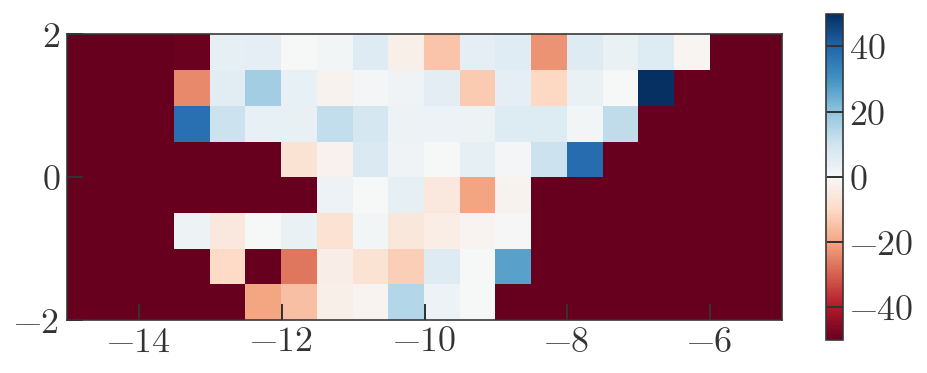

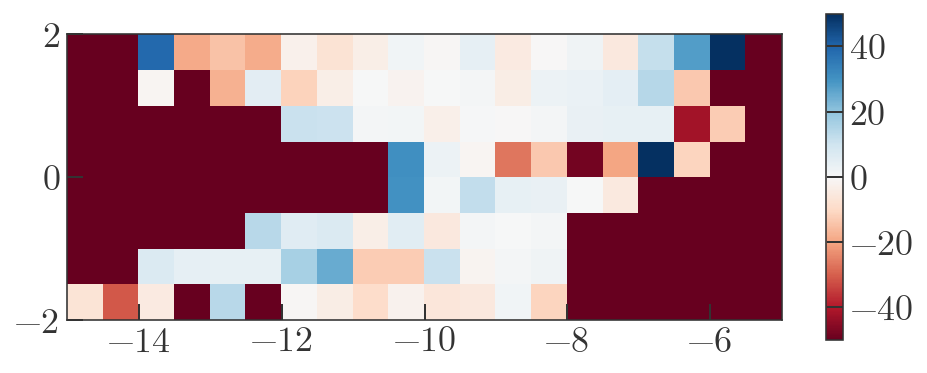

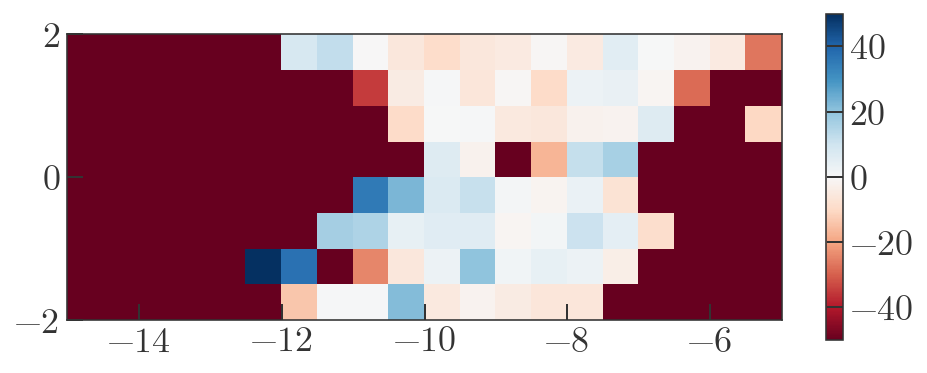

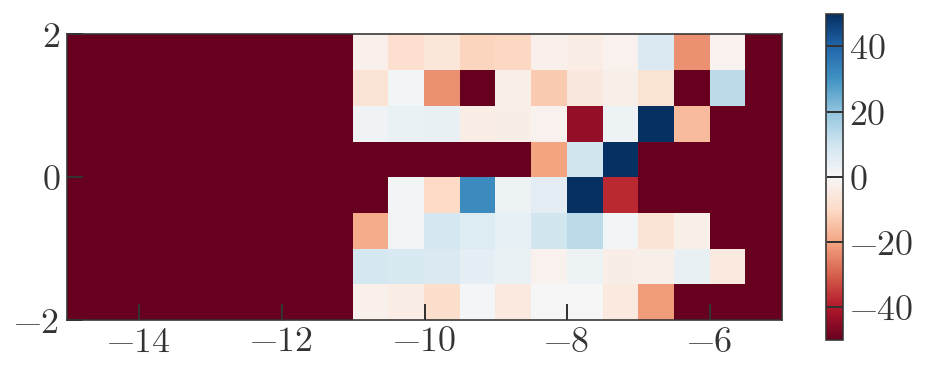

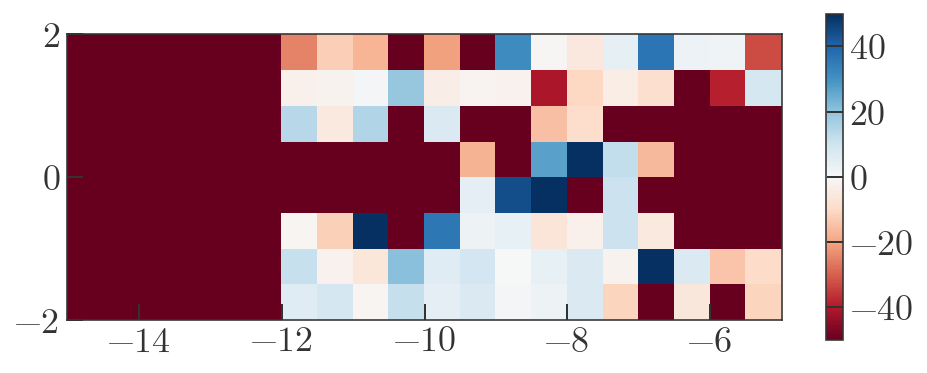

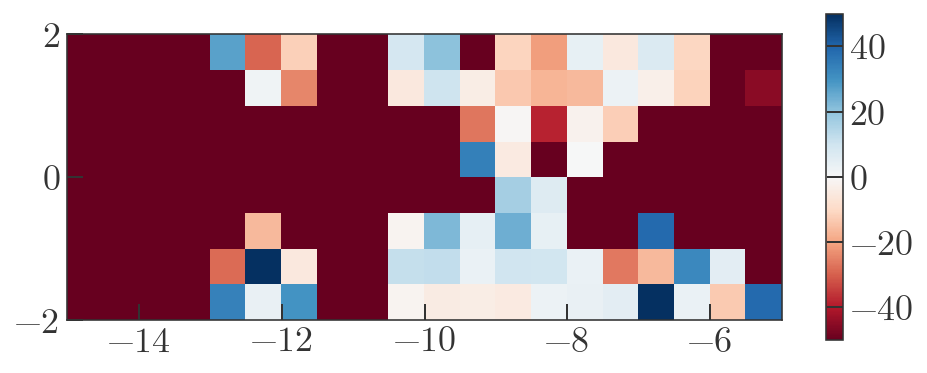

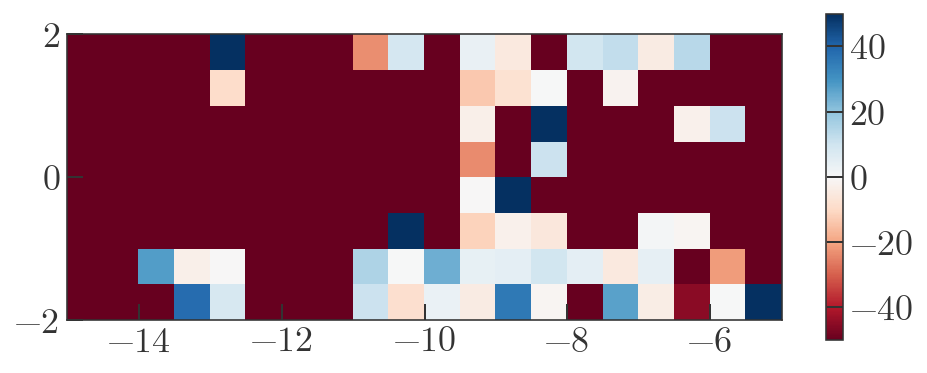

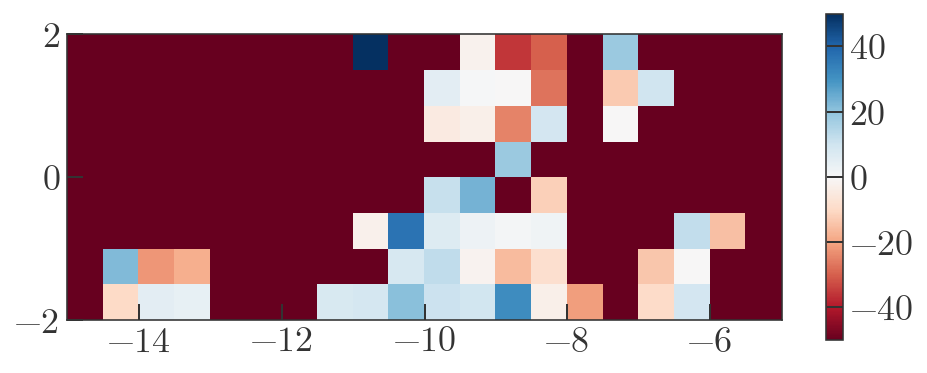

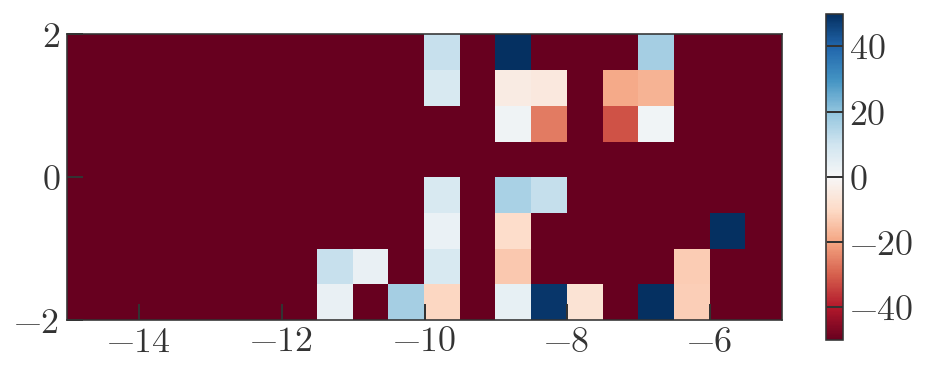

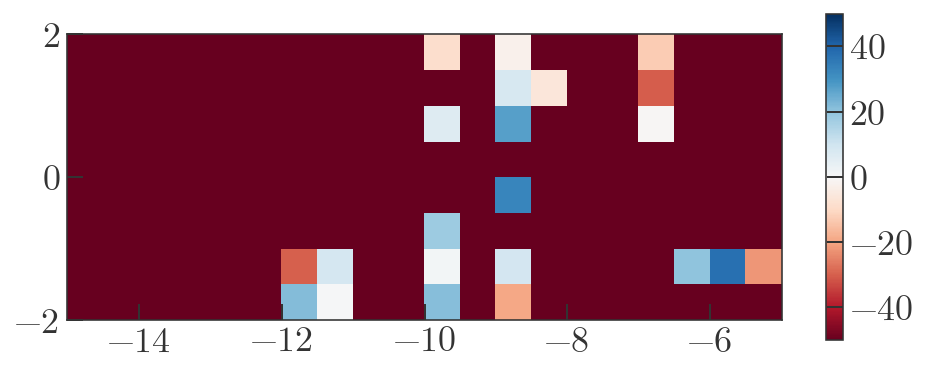

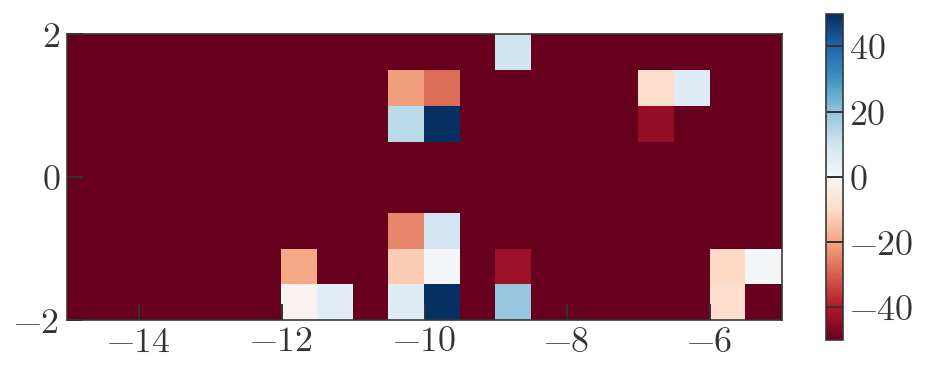

In [196]:
xbins, ybins = np.meshgrid(bres.bin_edges[0], bres.bin_edges[2])

for i in range(bres.statistic.shape[1]):
    fig, ax = plt.subplots(1, 1, figsize=(8,3))
    ax.set_aspect('equal')
    derp = ax.pcolormesh(xbins, ybins, bres.statistic[:,i].T, cmap='RdBu', vmin=-50, vmax=50)
    fig.colorbar(derp)